# **Análisis Exploratorio de Datos**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
import palmerpenguins

In [4]:
import sklearn.metrics

In [5]:
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [6]:
from utils import meta_df, count_valores, graph_bar, proportions_values, graph_proportions

In [7]:
penguin_color = {
    'Adelie': '#1d3461',
    'Gentoo': '#376996',
    'Chinstrap': '#829cbc'
}

## **Datos**

### **1. Colecta y validación de datos**

In [9]:
penguins_data = sns.load_dataset('penguins')
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [10]:
# ¿Qué tipo de datos son las variables del conjunto?
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
resume = meta_df(penguins_data)

In [12]:
resume

,Variable,Data_Type,Valores_Nulos,Distinct_Values
0,species,object,0,3
1,island,object,0,3
2,bill_length_mm,float64,2,164
3,bill_depth_mm,float64,2,80
4,flipper_length_mm,float64,2,55
5,body_mass_g,float64,2,94
6,sex,object,11,2


In [13]:
# Eliminar valores nulos

penguins_data.dropna(inplace=True)
penguins_data.reset_index(drop=True, inplace=True)

## **Análisis**

### **1. Análisis Univariado**

In [14]:
# Estadísticos que describen al conjunto de datos 
penguins_data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### **Variables categoricas**

#### **1.1 Especie**

##### **Conteo de Valores**

**Con Pandas**

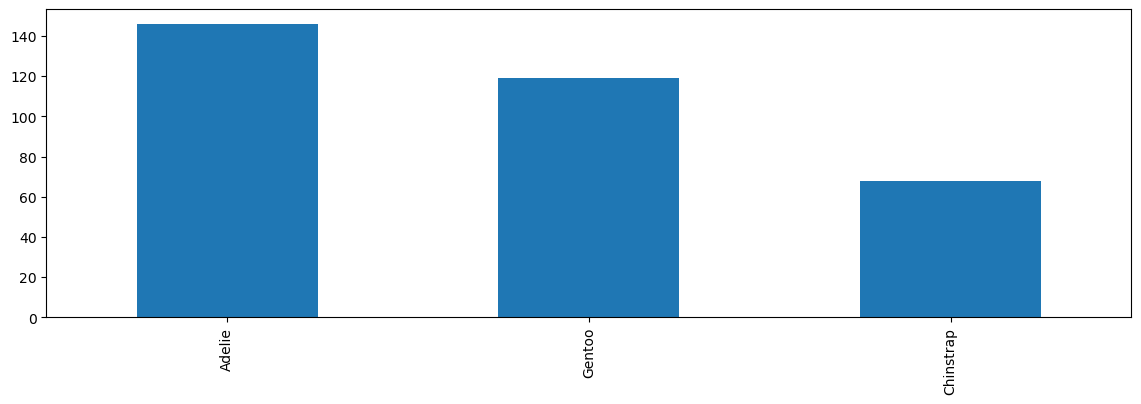

In [15]:
fig, ax = plt.subplots(figsize=(14, 4))
penguins_data['species'].value_counts().plot(kind='bar')
plt.show()

**Con Seaborn**

In [16]:
penguins_data_species = count_valores(penguins_data, 'species')
penguins_data_species

,species,penguins
0,Adelie,146
1,Gentoo,119
2,Chinstrap,68


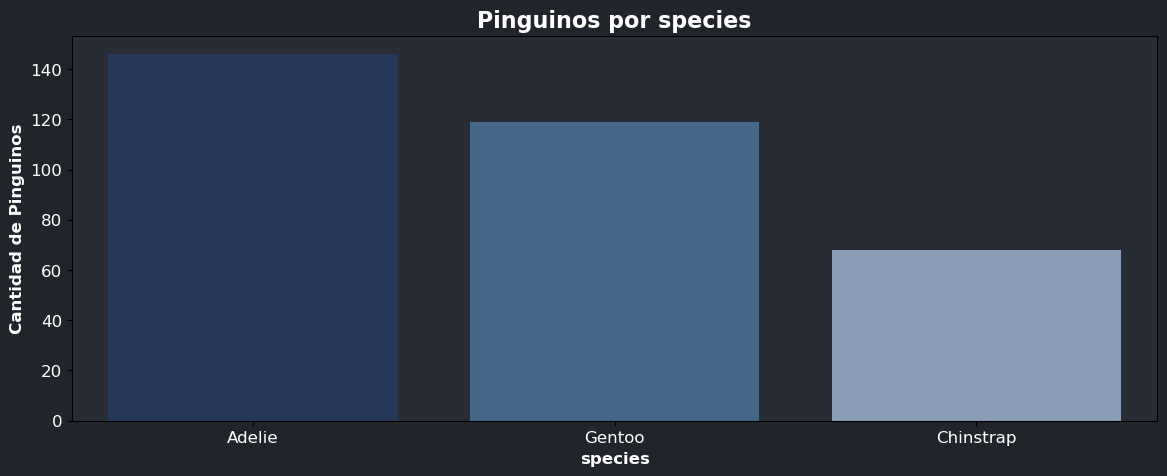

In [17]:
graph_bar(penguins_data_species, 'species')

##### **Graficando las proporciones**

In [18]:
penguins_species = proportions_values(penguins_data, 'species')
penguins_species

,species,penguins,%
0,Adelie,146,44
1,Gentoo,119,36
2,Chinstrap,68,20


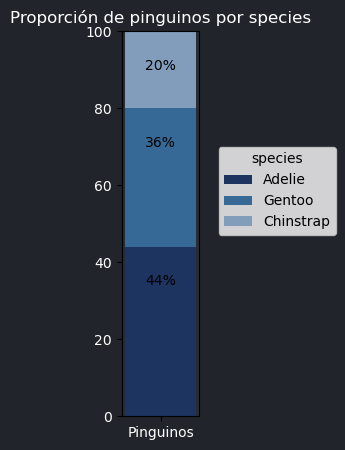

In [19]:
graph_proportions(penguins_species, 'species')

#### **1.2 Isla**

##### **Conteo de Valores**

In [18]:
penguins_data_island = count_valores(penguins_data, 'island')
penguins_data_island

,island,penguins
0,Biscoe,163
1,Dream,123
2,Torgersen,47


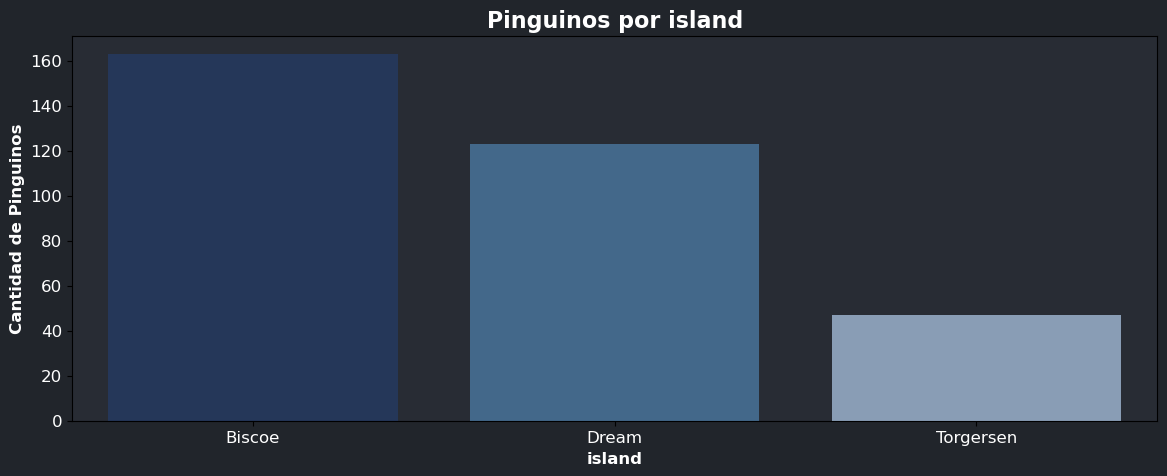

In [19]:
graph_bar(penguins_data_island, 'island')

##### **Graficando las proporciones**

In [20]:
penguins_island = proportions_values(penguins_data, 'island')
penguins_island

,island,penguins,%
0,Biscoe,163,49
1,Dream,123,37
2,Torgersen,47,14


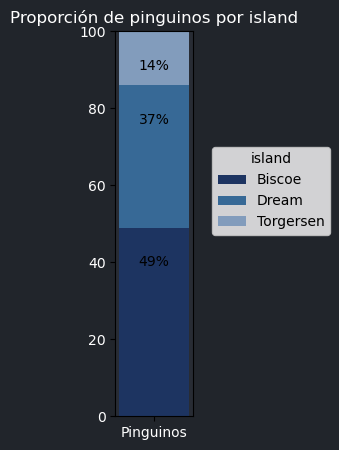

In [21]:
graph_proportions(penguins_island, 'island')

#### **1.3 Sexo**

##### **Conteo de Valores**

In [22]:
penguins_data_sex = count_valores(penguins_data, 'sex')
penguins_data_sex

,sex,penguins
0,Male,168
1,Female,165


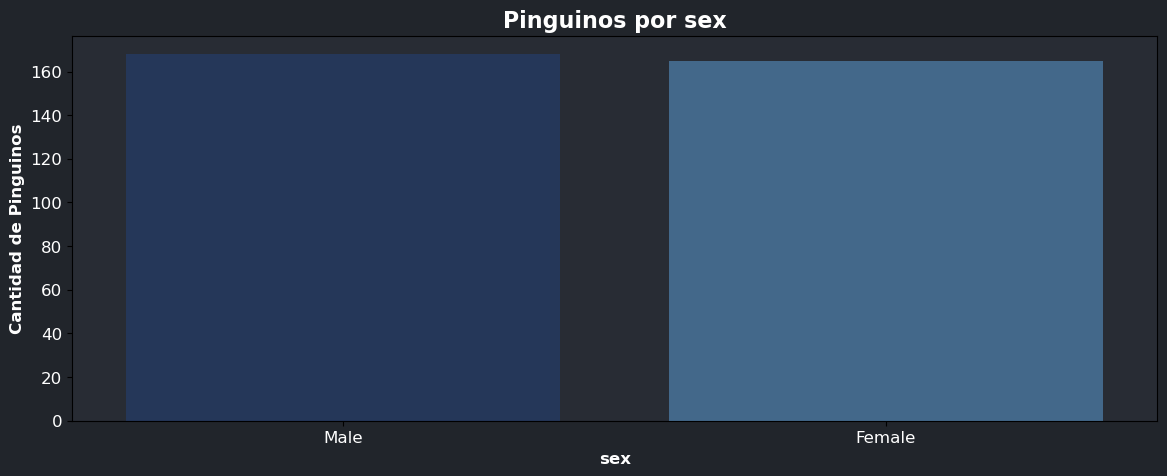

In [23]:
graph_bar(penguins_data_sex, 'sex')

##### **Graficando las proporciones**

In [24]:
penguins_sex = proportions_values(penguins_data, 'sex')
penguins_sex

,sex,penguins,%
0,Male,168,50
1,Female,165,50


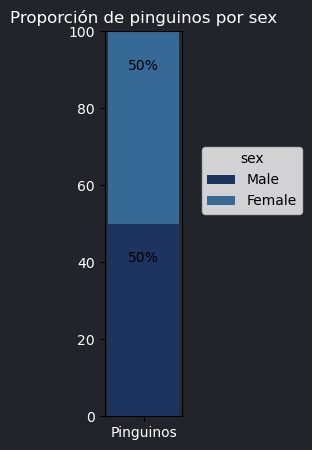

In [25]:
graph_proportions(penguins_sex, 'sex')

#### **Variables numéricas**

#### **1.4 Longitud del Pico**

##### **Medidas de Tendencia Central**

In [26]:
# Media
penguins_data['bill_length_mm'].mean()

43.99279279279279

In [27]:
# Mediana
penguins_data['bill_length_mm'].median()

44.5

In [28]:
# Moda
stats.mode(penguins_data['bill_length_mm'])

ModeResult(mode=array([41.1]), count=array([7]))

##### **Medidas de Dispersión**

#### **1.5 Profundidad del Pico**

##### **Medidas de Tendencia Central**

In [28]:
# Media
penguins_data['bill_depth_mm'].mean()

17.164864864864864

In [29]:
# Mediana
penguins_data['bill_depth_mm'].median()

17.3

In [30]:
# Moda
stats.mode(penguins_data['bill_depth_mm'])

ModeResult(mode=array([17.]), count=array([12]))

#### **1.6 Longitud de la aleta**

##### **Medidas de Tendencia Central**

In [31]:
# Media
penguins_data['flipper_length_mm'].mean()

200.96696696696696

In [32]:
# Mediana
penguins_data['flipper_length_mm'].median()

197.0

In [33]:
# Moda
stats.mode(penguins_data['flipper_length_mm'])

ModeResult(mode=array([190.]), count=array([21]))

In [34]:
penguins_data.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


#### **1.7 Masa corporal**

##### **Medidas de Tendencia Central**

In [35]:
# Media
penguins_data['body_mass_g'].mean()

4207.057057057057

In [36]:
# Mediana
penguins_data['body_mass_g'].median()

4050.0

In [37]:
# Moda
stats.mode(penguins_data['body_mass_g'])

ModeResult(mode=array([3800.]), count=array([12]))

In [38]:
penguins_x_island = pd.crosstab(index=penguins_data['island'], columns=penguins_data['species']).reset_index()
penguins_x_island.columns = ['island', 'Adelie', 'Chinstrap', 'Gentoo']
penguins_x_island.set_index('island', inplace=True)
penguins_x_island

,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


In [40]:
r = [i for i in range(len(penguins_x_island))]

totals = [i+j+k for i,j,k in zip(penguins_x_island['Adelie'], penguins_x_island['Chinstrap'], penguins_x_island['Gentoo'])]
adelie_Bars = [i / j * 100 for i,j in zip(penguins_x_island['Adelie'], totals)]
chinstrap_Bars = [i / j * 100 for i,j in zip(penguins_x_island['Chinstrap'], totals)]
gentoo_Bars = [i / j * 100 for i,j in zip(penguins_x_island['Gentoo'], totals)]

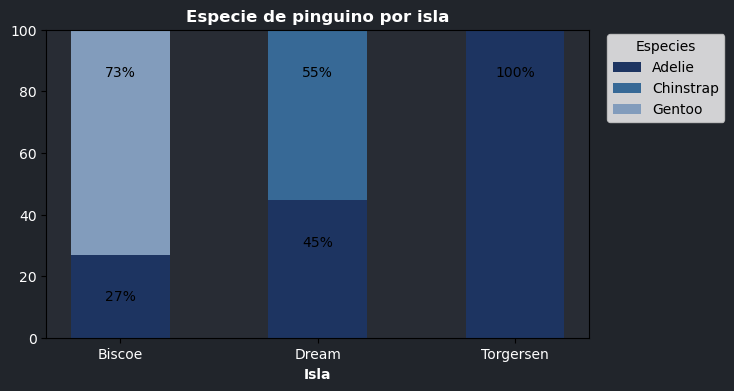

In [41]:
# plot
barWidth = 0.5
names = list(penguins_x_island.index)
y_offset = -15

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(7, 4))

plt.title(
    'Especie de pinguino por isla', 
    fontweight=1000, 
    size=12, 
    color='white'
)

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

# Create Bars
plt.bar(r, adelie_Bars, color='#1d3461', width=barWidth, label='Adelie')
plt.bar(r, chinstrap_Bars, bottom=adelie_Bars, color='#376996', width=barWidth, label='Chinstrap')
plt.bar(r, gentoo_Bars, bottom=[i+j for i,j in zip(adelie_Bars, chinstrap_Bars)], color='#829cbc', width=barWidth, label='Gentoo')
 
# Custom axis
plt.xticks(r, names, color='white', size=10)
plt.xlabel("Isla", fontweight=1000,color='white')
 
plt.yticks(color='white', size=10)
    
# Add labels
for bar in ax.patches:
    if bar.get_height() != 0:
        ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + bar.get_y() + y_offset,
          f'{round(bar.get_height())}%',
          ha='center',
          color='black',
          size=10
      )    
        
plt.legend(loc='lower right', title='Especies', bbox_to_anchor=(1.25, 0.7), borderaxespad=0)

# Show graphic
plt.show()